In [1]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [2]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<li> Here the count for all the numerical features is <b>545</b> which is equal to the <b>rows count of the dataset</b>. That means there are no null values in our dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


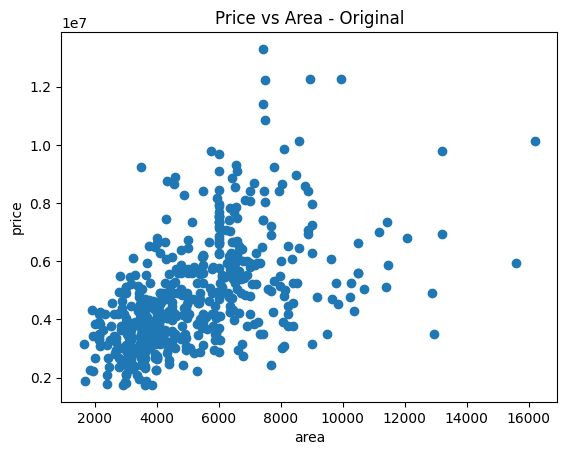

In [6]:
plt.scatter(df['area'],df['price'])
plt.xlabel('area')
plt.ylabel('price')
plt.title('Price vs Area - Original')
plt.show()

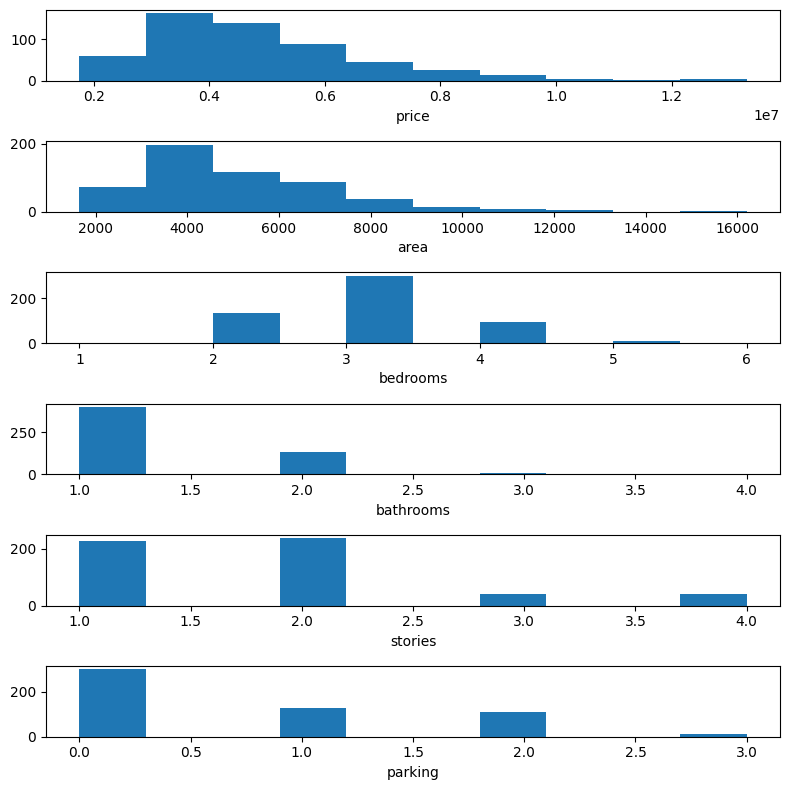

In [7]:
# numerical features
num_feat=df.select_dtypes(include=['number']).columns
def plot_num_feat():

    fig,axs=plt.subplots(6,1,figsize=(8,8))


    for idx,feat in enumerate(num_feat):
        axs[idx].hist(df[feat])

        axs[0].set_xlabel(num_feat[0])
        axs[1].set_xlabel(num_feat[1])
        axs[2].set_xlabel(num_feat[2])
        axs[3].set_xlabel(num_feat[3])
        axs[4].set_xlabel(num_feat[4])
        axs[5].set_xlabel(num_feat[5])

    plt.tight_layout()
    plt.show()

plot_num_feat()


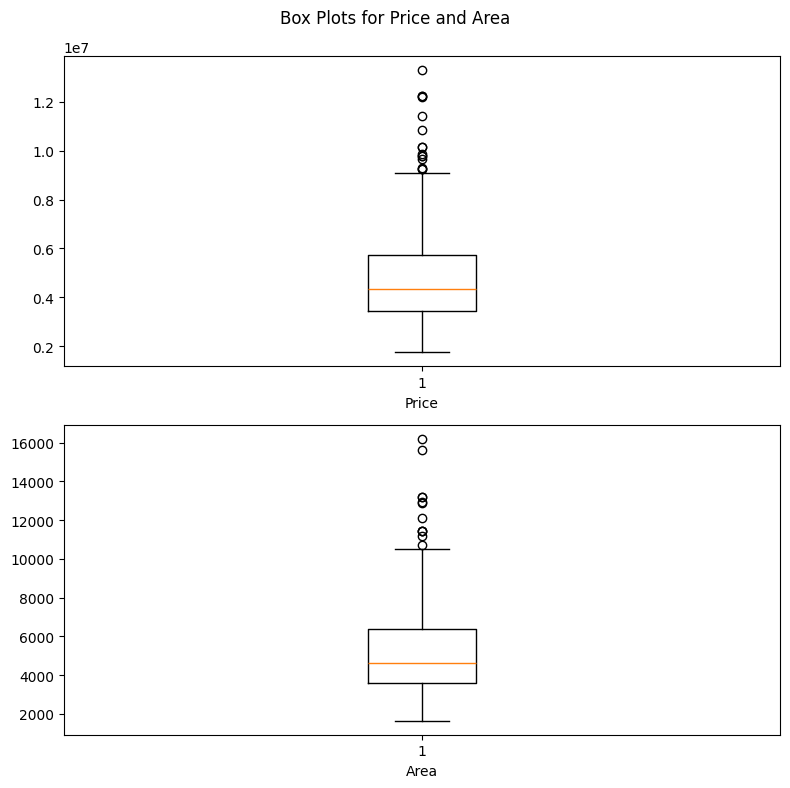

In [8]:
# box plots analysis

fig,axs=plt.subplots(2,1,figsize=(8,8))

plt.suptitle("Box Plots for Price and Area")
axs[0].boxplot(df['price'])
axs[0].set_xlabel('Price')
axs[1].boxplot(df['area'])
axs[1].set_xlabel('Area')

plt.tight_layout()
plt.show()

In [9]:
# lets see how much examples are there for each value of numerical features except price and area
for feat in num_feat:
    if feat!='price' and feat!='area':
        print(df[feat].value_counts())
    print("\n")





bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64


bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64


stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64


parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64




## Analysis From the Above Histograms and Value Counts
<li> We can see that the <b>price</b> and <b>area</b> are right skewed. it should be transformed to make it normally distributed.
<li> Also there are very less examples for bedrooms=(1,5,6).
<li> Relatively less examples for bathrooms =(3,4)
<li> Relatively less examples for stories =(3,4)
<li> Relatively less examples for parking =(3)

## Probable Solutions
<li> Could apply log transformation for price and area.
<li> Could replace values in dataset as:
    <li> bedroom 1     -->  bedroom 2
    <li> bedroom 5,6   -->  bedroom 4
    <li> bathrooms 3,4 -->  bathrooms 2
    <li> stories 4     -->  stories 3
    <li> parking 3     -->  parking 2


In [10]:
# features to apply transformation
dist_feat=['price','area']


def distributions_plot(df):
    fig,axs=plt.subplots(1,2,figsize=(8,8))
    plt.suptitle("Distribution Plots of Numeric Features")

    for idx,feat in enumerate(dist_feat):
        axs[idx].hist(df[feat])
    
    axs[0].set_xlabel('price')
    axs[1].set_xlabel('area')
    
    plt.tight_layout()
    plt.show()



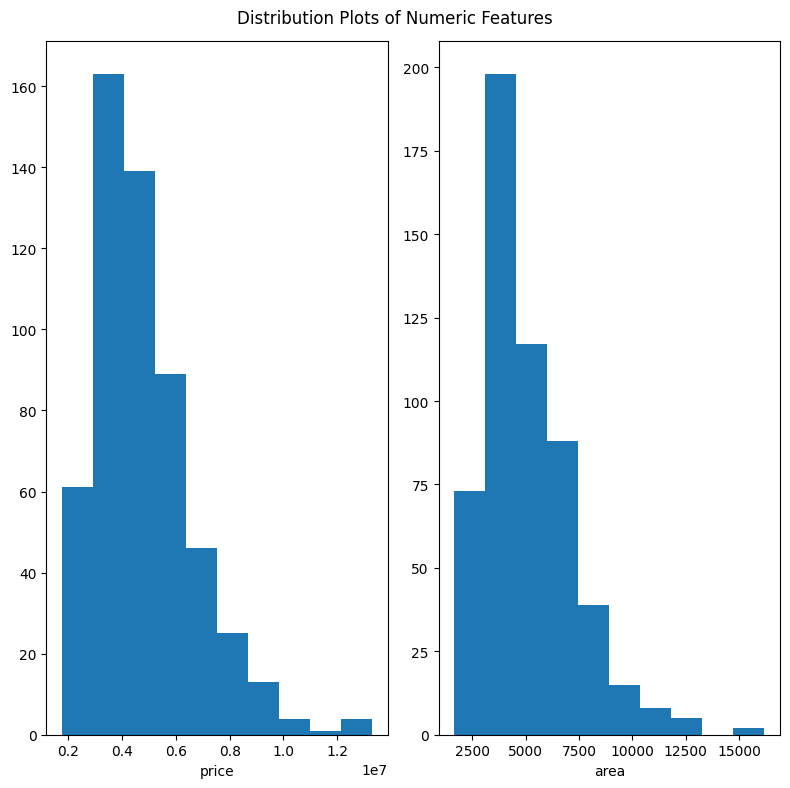

In [11]:
# before tranformation
distributions_plot(df)

In [12]:
# apply transformation to make data more symmetrical

def log_transormation(df):
    for feat in dist_feat:
        df[feat]=torch.log1p(torch.tensor(df[feat]))
        # df[feat]=torch.sqrt(torch.tensor(df[feat]))

# apply transformation
log_transormation(df)

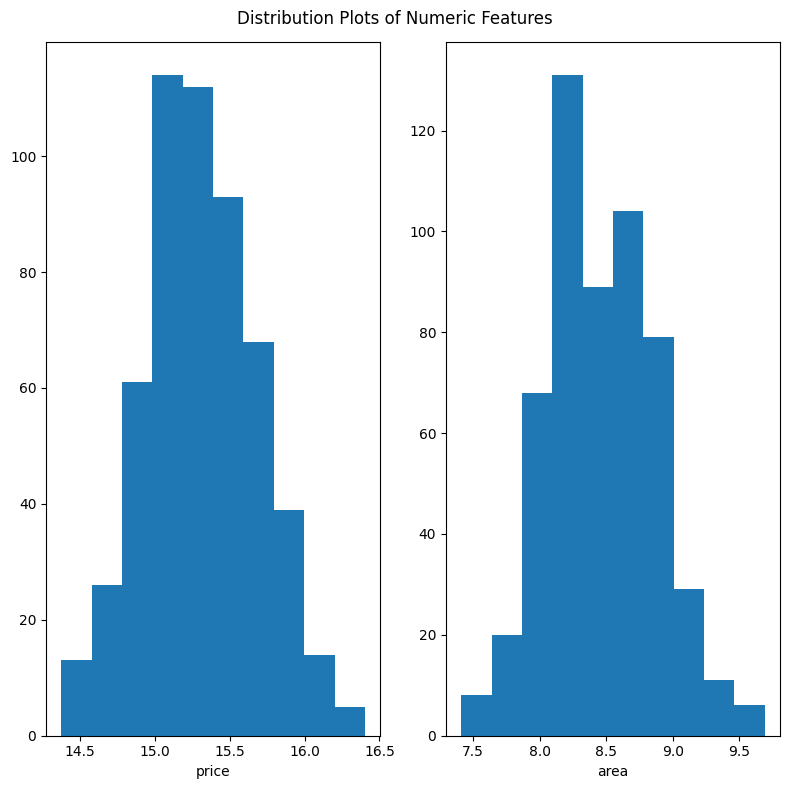

In [13]:
# after transformation
distributions_plot(df)

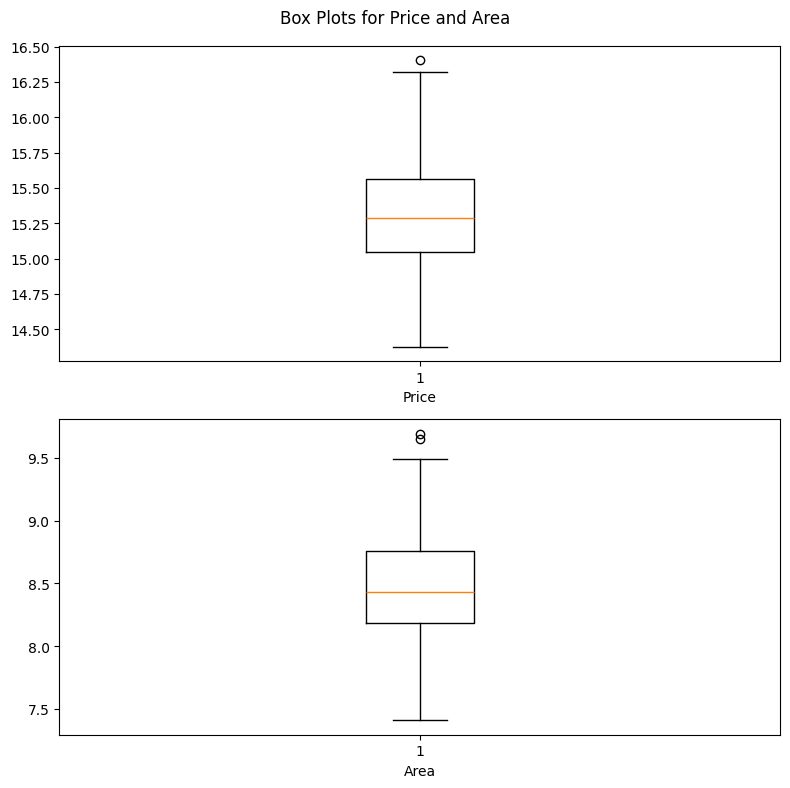

In [14]:
# box plots analysis

fig,axs=plt.subplots(2,1,figsize=(8,8))

plt.suptitle("Box Plots for Price and Area")
axs[0].boxplot(df['price'])
axs[0].set_xlabel('Price')
axs[1].boxplot(df['area'])
axs[1].set_xlabel('Area')

plt.tight_layout()
plt.show()

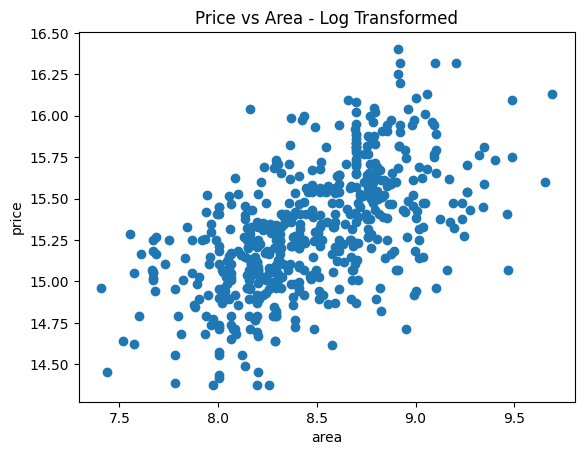

In [15]:
#after log transformation, seeing how price varies with area 

plt.scatter(df['area'],df['price'])
plt.xlabel('area')
plt.ylabel('price')
plt.title('Price vs Area - Log Transformed')
plt.show()

## Replacing values on numerical features except price and area

In [16]:

# Replacing bedrooms values
df['bedrooms']=[2 if v ==1 else v for v in df['bedrooms'].values]
df['bedrooms']=[4 if (v==5 or v==6) else v for v in df['bedrooms'].values]

# Replacing bathrooms values
df['bathrooms']=[2 if (v==3 or v==4) else v for v in df['bathrooms'].values]

# Replacing stories values
df['stories']=[3 if (v==4) else v for v in df['stories'].values]

# Replacing parking values
df['parking']=[2 if (v==3) else v for v in df['parking'].values]


## Plotting Histogram after Preprocessing

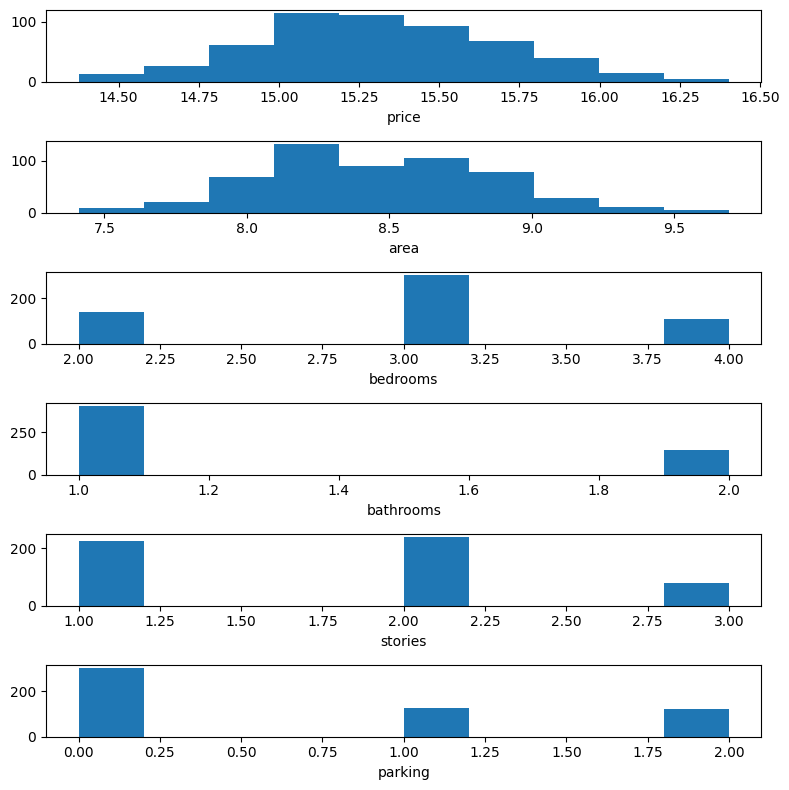

In [17]:
plot_num_feat()

## Exploring Categorical Features

In [18]:
categorical_features=['mainroad','guestroom','basement','prefarea','furnishingstatus','hotwaterheating','airconditioning']

for feat in categorical_features:
    print(df[feat].value_counts())
    print("\n")

mainroad
yes    468
no      77
Name: count, dtype: int64


guestroom
no     448
yes     97
Name: count, dtype: int64


basement
no     354
yes    191
Name: count, dtype: int64


prefarea
no     417
yes    128
Name: count, dtype: int64


furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


hotwaterheating
no     520
yes     25
Name: count, dtype: int64


airconditioning
no     373
yes    172
Name: count, dtype: int64




<li> We see all the categorical features except <b>furnishingstatus</b> has two categories and can be encode with 0 and 1.
<li> <b>furnishingstatus</b> has <b>3 categories</b>. Could be encode as:
<li> unfurnished           ---> 0
<li> semi-furnished        ---> 1
<li> furnished             ---> 2

In [19]:
n_df=df.copy()

In [20]:
n_df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,14.414348,8.006701,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,14.384879,7.783640,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,14.375127,8.194506,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,14.375127,7.976252,3,1,1,no,no,no,no,no,0,no,furnished
544,14.375127,8.256088,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [21]:
categorical_features

['mainroad',
 'guestroom',
 'basement',
 'prefarea',
 'furnishingstatus',
 'hotwaterheating',
 'airconditioning']

In [22]:
for feat in categorical_features:
    if feat!='furnishingstatus':
        n_df[feat]=[1 if val=='yes' else 0 for val in n_df[feat].values]
    else:
        n_df['furnishingstatus'] = n_df['furnishingstatus'].replace({
        'unfurnished': 0,
        'semi-furnished': 1,
        'furnished': 2
})

n_df.tail()


/tmp/ipykernel_15808/1875525046.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  n_df['furnishingstatus'] = n_df['furnishingstatus'].replace({


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,14.414348,8.006701,2,1,1,1,0,1,0,0,2,0,0
541,14.384879,7.783640,3,1,1,0,0,0,0,0,0,0,1
542,14.375127,8.194506,2,1,1,1,0,0,0,0,0,0,0
543,14.375127,7.976252,3,1,1,0,0,0,0,0,0,0,2
544,14.375127,8.256088,3,1,2,1,0,0,0,0,0,0,0


In [23]:
# analysing value counts for each category

for feat in categorical_features:
    print(n_df[feat].value_counts())
    print("\n")

mainroad
1    468
0     77
Name: count, dtype: int64


guestroom
0    448
1     97
Name: count, dtype: int64


basement
0    354
1    191
Name: count, dtype: int64


prefarea
0    417
1    128
Name: count, dtype: int64


furnishingstatus
1    227
0    178
2    140
Name: count, dtype: int64


hotwaterheating
0    520
1     25
Name: count, dtype: int64


airconditioning
0    373
1    172
Name: count, dtype: int64




In [24]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float32
 1   area              545 non-null    float32
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    int64  
dtypes: float32(2), int64(11)
memory usage: 51.2 KB


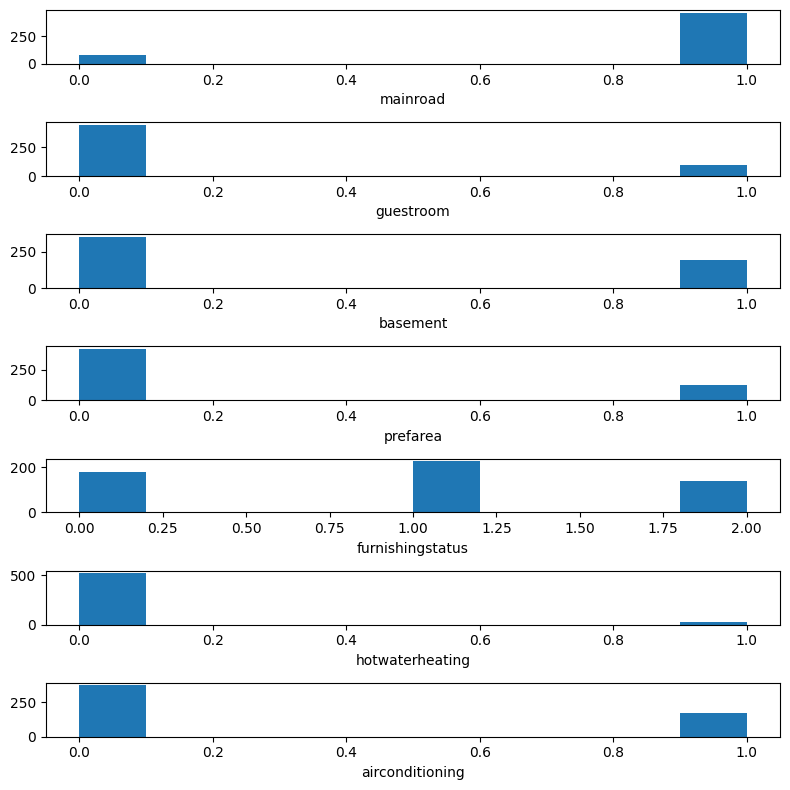

In [25]:
fig,axs=plt.subplots(len(categorical_features),1,figsize=(8,8))


for idx,feat in enumerate(categorical_features):
    axs[idx].hist(n_df[feat])
    axs[idx].set_xlabel(categorical_features[idx])

plt.tight_layout()
plt.show()

In [26]:
n_df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,14.414348,8.006701,2,1,1,1,0,1,0,0,2,0,0
541,14.384879,7.783640,3,1,1,0,0,0,0,0,0,0,1
542,14.375127,8.194506,2,1,1,1,0,0,0,0,0,0,0
543,14.375127,7.976252,3,1,1,0,0,0,0,0,0,0,2
544,14.375127,8.256088,3,1,2,1,0,0,0,0,0,0,0


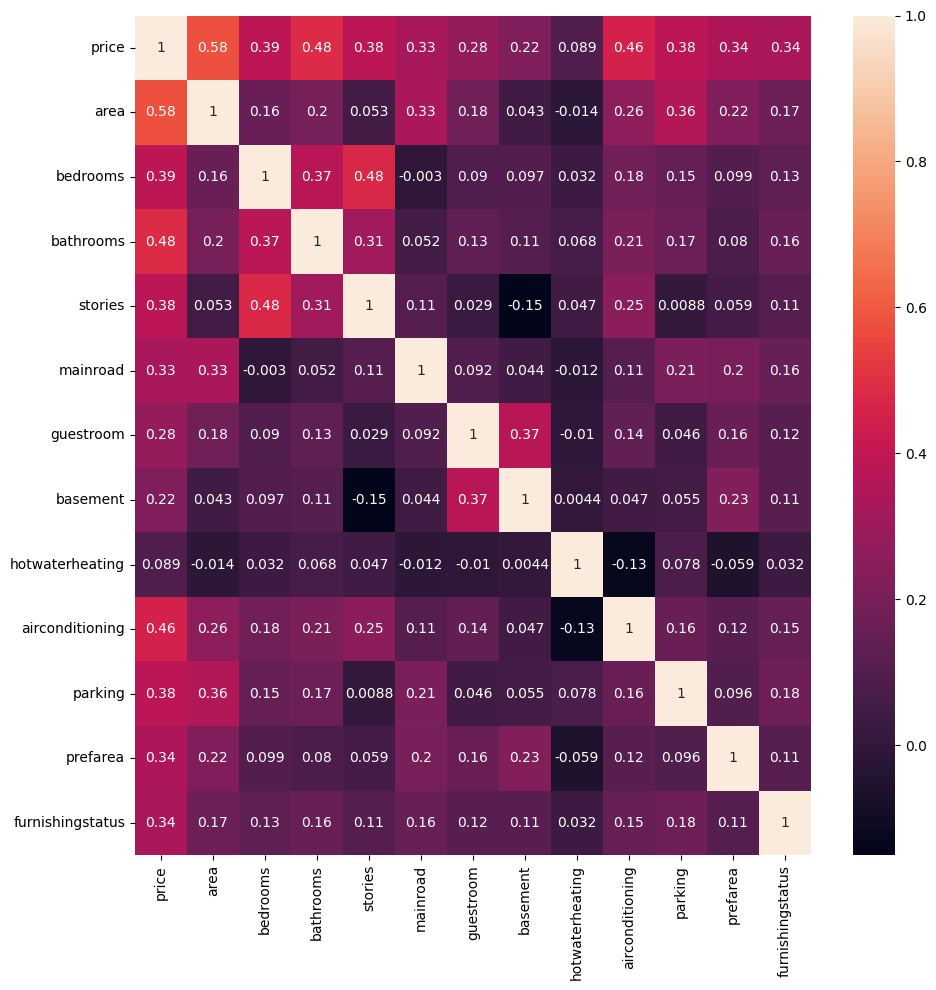

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(n_df.corr(),annot=True)
plt.tight_layout()
plt.show()

<li> We can see that the feature <b>hotwaterheating</b> has very low correlation with the target feature <b>price</b>.
<li> So, i choose to drop the feature <b>hotwaterheating</b>

## Choose to drop feature or NOT

In [28]:
# drop multiple features as they are correlated with other independent features
drop_features=['hotwaterheating']
drop=True

In [29]:
if drop:
    n_df=n_df.drop(columns=drop_features)

n_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,8.912069,4,2,3,1,0,0,1,2,1,2
1,16.321037,9.100637,4,2,3,1,0,0,1,2,0,2
2,16.321037,9.206432,3,2,2,1,0,1,0,2,1,1
3,16.318176,8.922791,4,2,2,1,0,1,1,2,1,2
4,16.250000,8.912069,4,1,2,1,1,1,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,14.414348,8.006701,2,1,1,1,0,1,0,2,0,0
541,14.384879,7.783640,3,1,1,0,0,0,0,0,0,1
542,14.375127,8.194506,2,1,1,1,0,0,0,0,0,0
543,14.375127,7.976252,3,1,1,0,0,0,0,0,0,2


# Scale and Train-Test Split of Dataset

In [30]:
# shuffle the dataset
n_df=n_df.sample(frac=1,random_state=42)

n_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
316,15.216694,8.682878,4,2,2,0,0,1,0,1,0,0
77,15.710128,8.779712,3,2,3,1,0,0,1,0,1,2
360,15.126543,8.304248,2,1,1,1,0,0,0,0,0,1
90,15.678040,8.517393,3,1,2,1,0,0,1,0,0,1
493,14.845130,8.284252,3,1,1,1,0,0,0,0,0,2


In [31]:
n_df.shape

(545, 12)

## Split dataframe into train -test and Scale the values

In [32]:

# scale the values to have a mean of 0 and a standard deviation of 1
def StandardScaler(train_df,test_df,column):
    if column=='price' or column=='area':
    # if True:
        test_df[column]=(test_df[column]-train_df[column].mean())/(train_df[column].std())
        train_df[column]=(train_df[column]-train_df[column].mean())/(train_df[column].std())
    else:
        test_df[column]=(test_df[column]-train_df[column].min())/(train_df[column].max()-train_df[column].min())
        train_df[column]=(train_df[column]-train_df[column].min())/(train_df[column].max()-train_df[column].min())


def split_and_scale(df):
    """
    df: new dataframe
    
    builds scaled train_df and test_df on all column to scale the values 
    to have a mean of 0 and a standard deviation of 1
    """

    # splitting training and test dataframe
    train_df=df.iloc[0:int(df.shape[0]*0.65),:]
    test_df=df.iloc[int(df.shape[0]*0.65):,:]
            

    # now scale the data on each columns
    for column in train_df.columns:
        StandardScaler(train_df=train_df,test_df=test_df,column=column)

    return train_df,test_df

In [33]:
train_df,test_df=split_and_scale(n_df)

/tmp/ipykernel_15808/3147306071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[column]=(test_df[column]-train_df[column].mean())/(train_df[column].std())
/tmp/ipykernel_15808/3147306071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[column]=(train_df[column]-train_df[column].mean())/(train_df[column].std())
/tmp/ipykernel_15808/3147306071.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

## Converting corresponding dataframe to tensors

In [34]:
# splitting training and test data
X_train=torch.tensor(train_df.iloc[:,1:].values,dtype=torch.float32)
Y_train=torch.tensor(train_df.iloc[:,0].values,dtype=torch.float32).reshape(X_train.shape[0],1)

X_test=torch.tensor(test_df.iloc[:,1:].values,dtype=torch.float32)
Y_test=torch.tensor(test_df.iloc[:,0].values,dtype=torch.float32).reshape(X_test.shape[0],1)

print(f"X_train shape: {X_train.shape}\n\
X_test shape: {X_test.shape}\n\
Y_train shape: {Y_train.shape}\n\
Y_test shape: {Y_test.shape}")


X_train shape: torch.Size([354, 11])
X_test shape: torch.Size([191, 11])
Y_train shape: torch.Size([354, 1])
Y_test shape: torch.Size([191, 1])


# Training ( MSE as the Loss Function)

## Initialize Weights and Biases

In [35]:
# initializing random weight and bias
torch.manual_seed(42)

W=torch.randn((X_train.shape[1],1))
b=torch.randn((1,1))

print(W.shape,b.shape)
W.dtype

torch.Size([11, 1]) torch.Size([1, 1])


torch.float32

In [36]:
loss_list=[]

In [37]:
for i in range(4000):
    
    Y_hat=X_train@W+b
    
    Loss=1/2*((Y_hat-Y_train)**2).mean()
    loss_list.append(Loss)

    dL_dy_hat=(Y_hat-Y_train)/Y_train.shape[0]
    dy_hat_dW=X_train
    dL_db=dL_dy_hat.sum()
    dL_dW=dy_hat_dW.T@dL_dy_hat

    W-=0.01*dL_dW
    b-=0.01*dL_db

In [38]:
loss_list[-1]


tensor(0.1598)

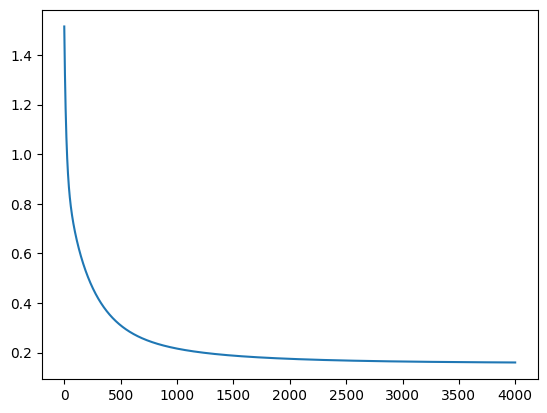

In [39]:
plt.plot(loss_list)

# Train/Test R2 Score

In [40]:
def R2_score(y_pred: torch.tensor,y_true: torch.tensor):
    y_bar = y_true.mean()
    ssr = ((y_true-y_pred)**2).sum()
    tts = ((y_true-y_bar)**2).sum()
    score = 1-(ssr/tts)
    return score.item()

In [41]:
print(f"Train Score: {R2_score(Y_hat.numpy(),Y_train.numpy())}")
print(f"Test Score: {R2_score((X_test@W+b).numpy(),Y_test.numpy())}")

Train Score: 0.6794219315052032
Test Score: 0.676596611738205


# Training (Logcoshx as the Cost funtion)

In [42]:
# initialize weight
W=torch.randn((X_train.shape[1],1))
b=torch.randn((1,1))

print(W.shape,b.shape)
W.dtype

torch.Size([11, 1]) torch.Size([1, 1])


torch.float32

In [43]:
loss_list=[]

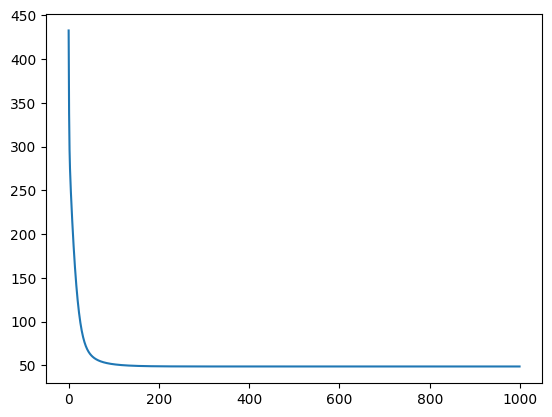

In [44]:
# train the model
for i in range(1000):
    Y_hat=X_train@W+b
    
    Loss=torch.log(torch.cosh(Y_hat-Y_train)).sum()
    loss_list.append(Loss)

    dL_dy_hat=torch.tanh(Y_hat-Y_train)
    dy_hat_dW=X_train
    dL_db=dL_dy_hat.sum()
    dL_dW=dy_hat_dW.T@dL_dy_hat

    W-=0.001*dL_dW
    b-=0.001*dL_db

# plot the loss
plt.plot(loss_list)

# Train/Test R2 Score

In [45]:
print(f"Train Score: {R2_score(Y_hat.numpy(),Y_train.numpy())}")
print(f"Test Score: {R2_score((X_test@W+b).numpy(),Y_test.numpy())}")

Train Score: 0.684247612953186
Test Score: 0.6843266189098358


In [46]:
# sns.pairplot(train_df)

# Training MAE as the Loss Function

In [47]:
# initialize weight
W=torch.randn((X_train.shape[1],1))
b=torch.randn((1,1))

print(W.shape,b.shape)
W.dtype

torch.Size([11, 1]) torch.Size([1, 1])


torch.float32

In [48]:
loss_list=[]

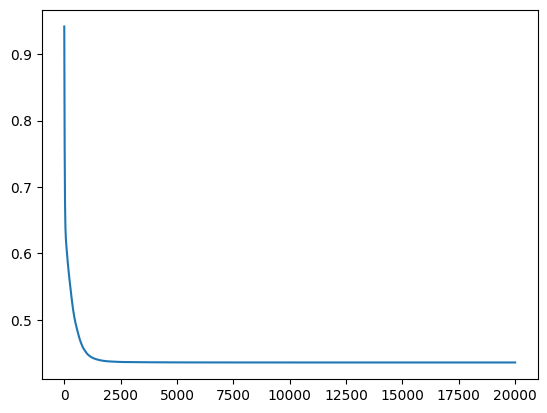

In [51]:
# train the model
for i in range(10000):
    Y_hat=X_train@W+b
    
    Loss=(abs(Y_hat-Y_train)).mean()

    # for MAE dL_dy_hat has two values according to (Y_hat-Y) is less than or greater than 0
    dL_dy_hat=(torch.tensor([1 if Y_hat[i,0]>Y_train[i,0] else -1 for i in range(Y_hat.shape[0])])/Y_train.shape[0]).reshape(X_train.shape[0],1)
    loss_list.append(Loss)

    # gradient calculation
    dy_hat_dW=X_train
    dL_db=dL_dy_hat.sum()
    dL_dW=dy_hat_dW.T@dL_dy_hat

    # Weights and biases optimization
    W-=0.01*dL_dW
    b-=0.01*dL_db

# plot the loss
plt.plot(loss_list)

# Train/Test R2 Score

In [52]:
print(f"Train Score: {R2_score(Y_hat.numpy(),Y_train.numpy())}")
print(f"Test Score: {R2_score((X_test@W+b).numpy(),Y_test.numpy())}")

Train Score: 0.6782596111297607
Test Score: 0.6745504140853882
